In [12]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [9]:
def read_dataset(pattern_match:str):
    files = glob.glob(pattern_match)
    data = []
    for file in files:
        name = file.split("_")[0].split("\\")[-1]
        instance = pd.read_csv(file, sep="\t")
        instance= instance.drop(['Cell2Volts', 'Cell3Volts', 'Cell4Volts', 'Cell5Volts', 'Cell6Volts',
            'Cell7Volts', 'Cell8Volts', 'Cell9Volts', 'Cell10Volts', 'Cell11Volts',
            'Cell12Volts', 'Cell13Volts', 'Cell14Volts', 'Cell15Volts',
            'Cell16Volts', 'Cell2IR', 'Cell3IR', 'Cell4IR', 'Cell5IR',
            'Cell6IR', 'Cell7IR', 'Cell8IR', 'Cell9IR', 'Cell10IR', 'Cell11IR',
            'Cell12IR', 'Cell13IR', 'Cell14IR', 'Cell15IR', 'Cell16IR', 'BP1PWM',
            'BP2PWM', 'BP3PWM', 'BP4PWM', 'BP5PWM', 'BP6PWM', 'BP7PWM', 'BP8PWM',
            'BP9PWM', 'BP10PWM', 'BP11PWM', 'BP12PWM', 'BP13PWM', 'BP14PWM',
            'BP15PWM', 'BP16PWM', 'Debug1', 'Debug2', 'Debug3', 'Unnamed: 75'], axis=1)
        instance["id"] = name
        instance = instance[instance['Mode'] > 6] # remove intial charge
        plt.plot(instance["AhrOUT"], instance["Cell1Volts"])
        data.append(instance)
    return pd.concat(data)

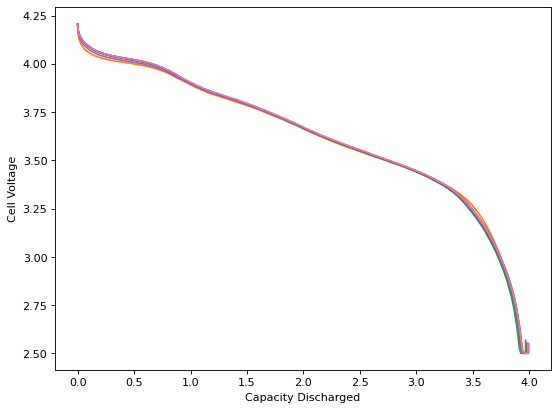

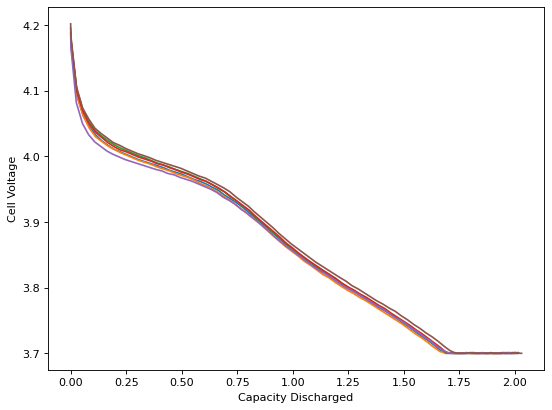

In [15]:
figure(figsize=(8, 6), dpi=80)
cycle = read_dataset("data/*_cell_cycle.txt")
plt.xlabel("Capacity Discharged")
plt.ylabel("Cell Voltage")
plt.show()
figure(figsize=(8, 6), dpi=80)
storage = read_dataset("data/*_cell_storage.txt")
plt.xlabel("Capacity Discharged")
plt.ylabel("Cell Voltage")
plt.show()

In [4]:
cycle.to_excel("cycle_data.xlsx")
storage.to_excel("10A_discharge.xlsx")